In [1]:
# 기본적 modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])
plt.rcParams['font.family'] ='Malgun Gothic'
import seaborn as sns
from IPython.display import Image

# 회귀분석 modules
import statsmodels.api as sm
from scipy.stats import skew, kurtosis

# 머신러닝 modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from catboost import CatBoostClassifier


# warnings 무시
import warnings
warnings.filterwarnings('ignore')

# 팀소개

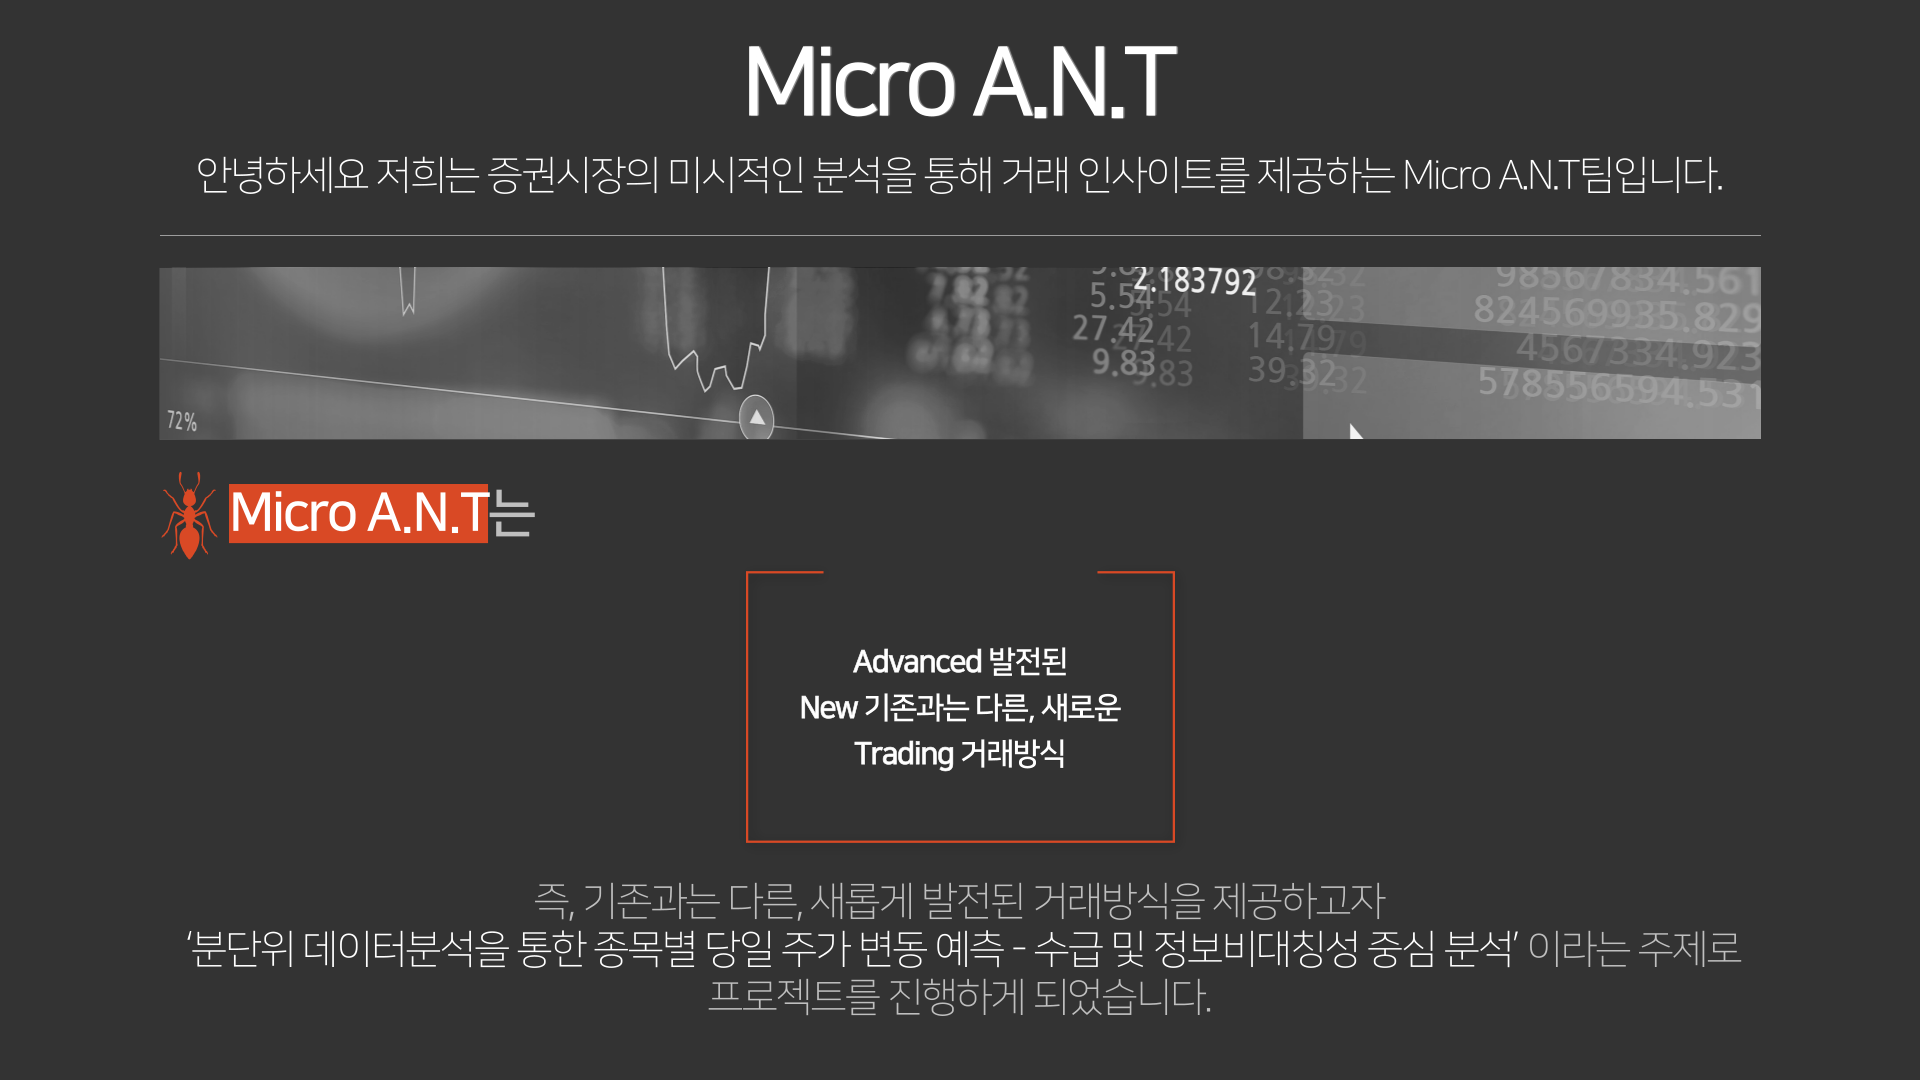

In [2]:
Image('팀명.png')

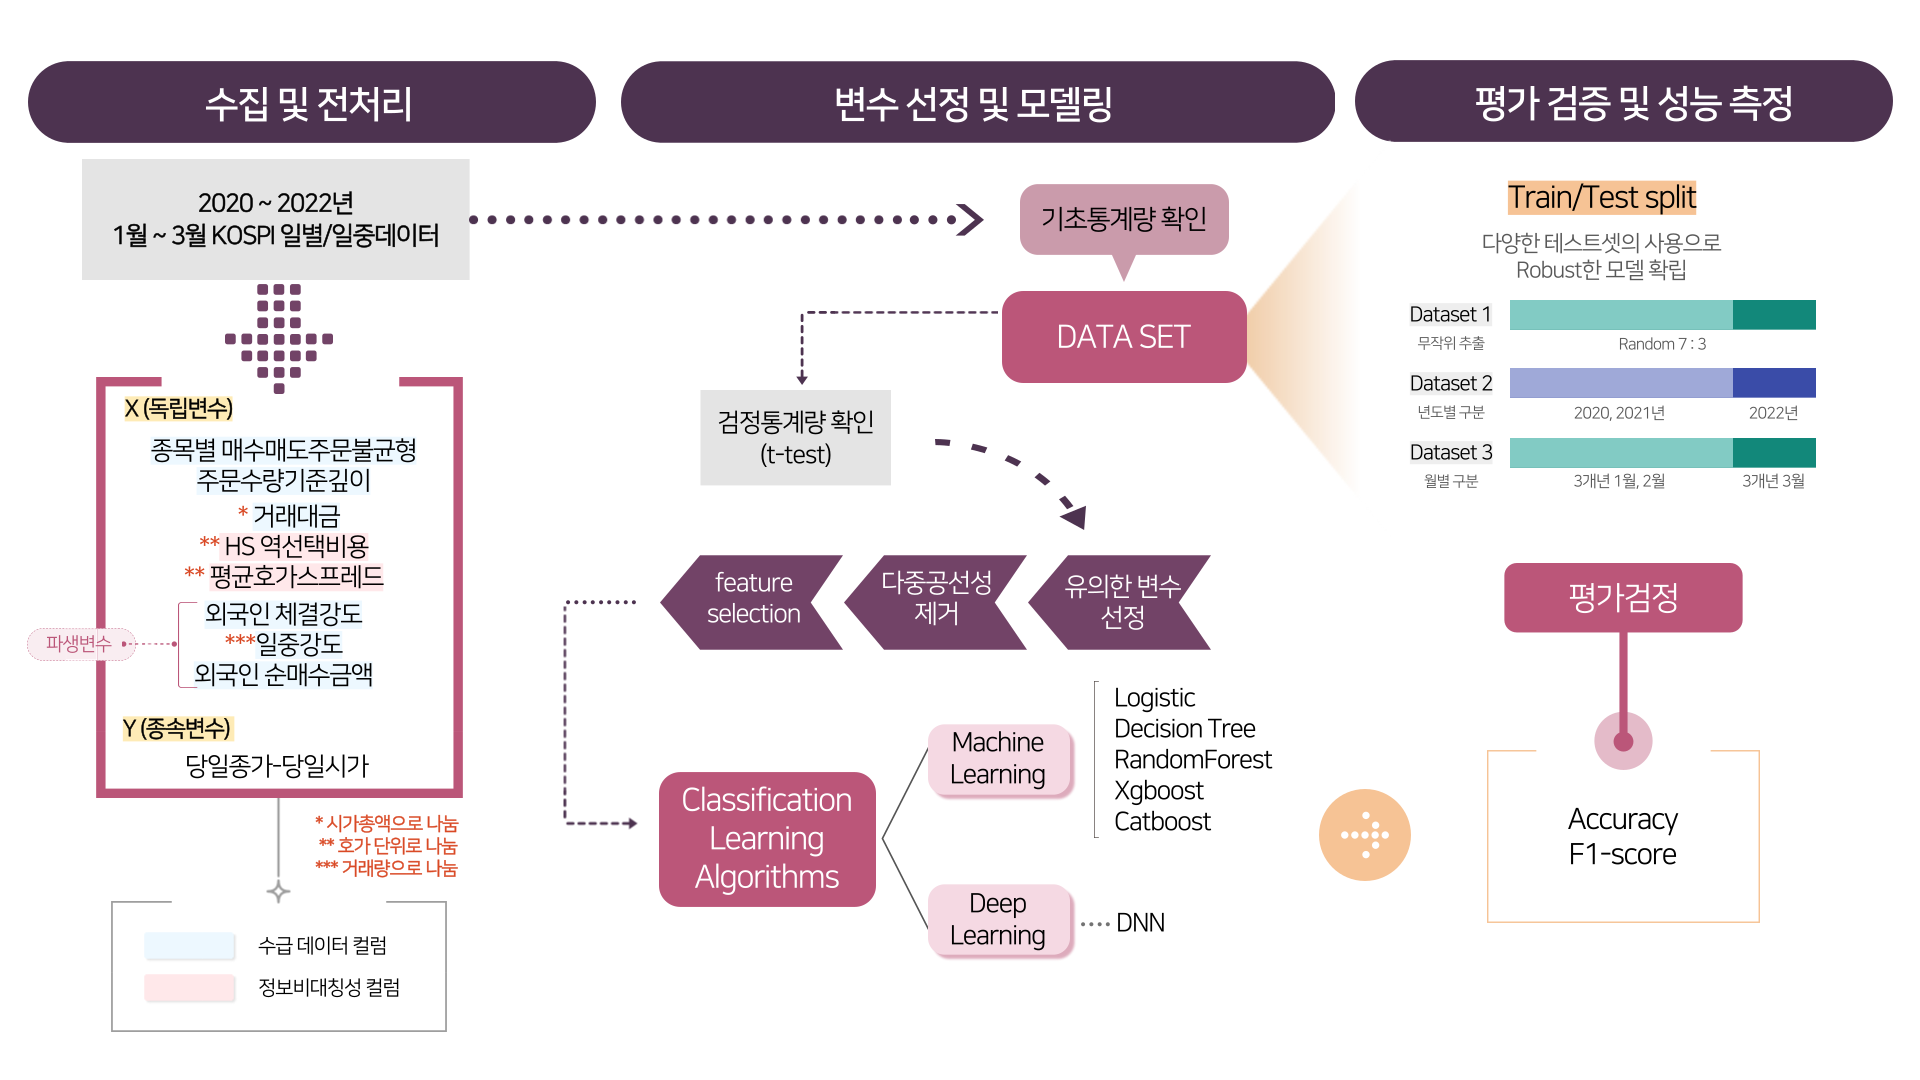

In [3]:
Image('flowchart2.png')

# 데이터

KRX의 자료를 최대한 활용하고자 **'주식' 파일에 있는 일별 / 일중 / 투자자별 3가지 데이터를 모두 사용**하였습니다. 해당 데이터 중 필요한 컬럼들을 추출한 뒤, '외국인체결강도' , '일중강도' , '외국인순매수' 와 같은 **파생변수**들을 새로이 생성하였습니다.

In [4]:
import os

#경로 지정해주기
path1 = './일별/' 

path2_1 = './일중/2020/'
path2_2 = './일중/2021/'
path2_3 = './일중/2022/'

path3_1 = './투자자별/2020/'
path3_2 = './투자자별/2021/'
path3_3 = './투자자별/2022/'

#파일 리스트 저장하기
file_list1 = os.listdir(path1)  # 일별데이터 불러와서 저장

file_list2_1 = os.listdir(path2_1) # 2020년도 일중데이터
file_list2_2 = os.listdir(path2_2) # 2021년도 일중데이터
file_list2_3 = os.listdir(path2_3) # 2022년도 일중데이터

file_list3_1 = os.listdir(path3_1) # 2020년도 투자자별 일중데이터
file_list3_2 = os.listdir(path3_2) # 2021년도 투자자별 일중데이터
file_list3_3 = os.listdir(path3_3) # 2022년도 투자자별 일중데이터

file_list_py1 = [file for file in file_list1 if file.endswith('.csv')]

file_list_py2_1 = [file for file in file_list2_1 if file.endswith('.csv')]
file_list_py2_2 = [file for file in file_list2_2 if file.endswith('.csv')]
file_list_py2_3 = [file for file in file_list2_3 if file.endswith('.csv')]

file_list_py3_1 = [file for file in file_list3_1 if file.endswith('.csv')]
file_list_py3_2 = [file for file in file_list3_2 if file.endswith('.csv')]
file_list_py3_3 = [file for file in file_list3_3 if file.endswith('.csv')]

일별데이터 = pd.DataFrame() #일별 데이터 데이터프레임

일중데이터_2020 = pd.DataFrame() # 2020 일증 데이터 데이터프레임
일중데이터_2021 = pd.DataFrame() # 2021 일중 데이터 데이터프레임
일중데이터_2022 = pd.DataFrame() # 2022 일중 데이터 데이터프레임

투자자데이터_2020 = pd.DataFrame() # 2020 일증 데이터 데이터프레임
투자자데이터_2021 = pd.DataFrame() # 2021 일증 데이터 데이터프레임
투자자데이터_2022 = pd.DataFrame() # 2022 일증 데이터 데이터프레임


### 일별데이터 불러와서 데이터 합치기

In [5]:
#일별csv
for i in file_list_py1:
    data1 = pd.read_csv(path1 + i,encoding='cp949')
    일별데이터 = pd.concat([일별데이터,data1])


### 2020년도 일중데이터 불러와서 데이터 합치기

In [6]:
#일중csv
for i in file_list_py2_1: # 2020년도 일중데이터
    data2_1 = pd.read_csv(path2_1 + i,encoding='cp949',usecols=[0, 1, 3, 4, 5, 6, 7, 8, 10, 24, 27, 31, 32])
    일중데이터_2020 = pd.concat([일중데이터_2020,data2_1])

### 2021년도 일중데이터 불러와서 데이터 합치기

In [7]:
for i in file_list_py2_2: # 2021년도 일중데이터
    data2_2 = pd.read_csv(path2_2 + i,encoding='cp949',usecols=[0, 1, 3, 4, 5, 6, 7, 8, 10, 24, 27, 31, 32])
    일중데이터_2021 = pd.concat([일중데이터_2021,data2_2])

### 2022년도 일중데이터 불러와서 데이터 합치기

In [8]:
for i in file_list_py2_3: # 2022년도 일중데이터
    data2_3 = pd.read_csv(path2_3 + i,encoding='cp949',usecols=[0, 1, 3, 4, 5, 6, 7, 8, 10, 24, 27, 31, 32])
    일중데이터_2022 = pd.concat([일중데이터_2022,data2_3])

### 2020년도 투자자별데이터 불러와서 데이터 합치기

In [9]:
#투자자별csv
for i in file_list_py3_1: # 2020년도 투자자별 데이터
    data3_1 = pd.read_csv(path3_1 + i,encoding='cp949')
    투자자데이터_2020 = pd.concat([투자자데이터_2020,data3_1])

### 2021년도 투자자별데이터 불러와서 데이터 합치기

In [10]:
for i in file_list_py3_2: # 2021년도 투자자별 데이터
    data3_2 = pd.read_csv(path3_2 + i,encoding='cp949')
    투자자데이터_2021 = pd.concat([투자자데이터_2021,data3_2])

### 2022년도 투자자별데이터 불러와서 데이터 합치기

In [13]:
for i in file_list_py3_3: # 2022년도 투자자별 데이터
    data3_3 = pd.read_csv(path3_3 + i,encoding='cp949')
    투자자데이터_2022 = pd.concat([투자자데이터_2022,data3_3])

In [14]:
일별데이터.reset_index(drop = True,inplace=True) # 일별데이터 데이터프레임 인덱스 리셋

일중데이터_2020.reset_index(drop = True,inplace=True)  # 2020년도 일중데이터 데이터프레임 인덱스 리셋
일중데이터_2021.reset_index(drop = True,inplace=True) # 2021년도 일중데이터 데이터프레임 인덱스 리셋
일중데이터_2022.reset_index(drop = True,inplace=True) # 2022년도 일중데이터 데이터프레임 인덱스 리셋

투자자데이터_2020.reset_index(drop = True,inplace=True) # 2020년도 투자자별 데이터 데이터프레임 인덱스 리셋
투자자데이터_2021.reset_index(drop = True,inplace=True) # 2021년도 투자자별 데이터 데이터프레임 인덱스 리셋
투자자데이터_2022.reset_index(drop = True,inplace=True) # 2022년도 투자자별 데이터 데이터프레임 인덱스 리셋


# 일별데이터 

In [16]:
df_일별시세정보=일별데이터
df_일별시세정보.to_csv('일별데이터.csv',encoding='cp949')
df_일별시세정보.head(10)

,거래일자,시장ID,종목코드,종목명,시가,고가,저가,종가,거래량,거래대금,...,주문량기준취소율,종목별거래횟수기준매수매도불균형,종목별거래량기준매수매도불균형,주문횟수기준주문불균형,주문량기준주문불균형,평균호가스프레드,평균비율스프레드,평균유효스프레드,평균실현스프레드,HS 역선택비용
0,20200102,STK,KR7000020008,동화약품보통주,8340,8400,8290,8400,111305,930888220,...,0.282367,0.589258,0.743097,1.174070,1.037233,17.741088,0.224266,21.390205,10.535714,10.854491
1,20200103,STK,KR7000020008,동화약품보통주,8400,8450,8290,8360,96437,805426020,...,0.302782,0.384342,0.445690,1.053480,0.753628,19.329715,0.217160,21.352313,8.745342,12.606971
2,20200106,STK,KR7000020008,동화약품보통주,8290,8330,8120,8180,73230,599423140,...,0.268639,0.423129,0.481504,1.577750,0.804115,20.122557,0.239991,20.802721,7.293777,13.508944
3,20200107,STK,KR7000020008,동화약품보통주,8200,8280,8090,8160,117904,960724080,...,0.255621,0.445963,0.617440,1.382292,0.846414,18.379562,0.188002,16.372671,-3.796296,20.168967
4,20200108,STK,KR7000020008,동화약품보통주,8170,8170,7830,7930,263246,2094786500,...,0.267502,0.331967,0.431773,1.485695,0.910060,19.933810,0.211230,22.397541,-3.992908,26.390449
5,20200109,STK,KR7000020008,동화약품보통주,8020,8060,7900,7900,50346,400667630,...,0.283543,0.375758,0.326390,0.832016,0.606495,14.692839,0.160975,12.681818,4.833948,7.847870
6,20200110,STK,KR7000020008,동화약품보통주,7970,8140,7880,8100,77059,619079150,...,0.300745,0.670386,0.731620,0.968841,0.954877,20.693118,0.239381,25.416309,10.786106,14.630203
7,20200113,STK,KR7000020008,동화약품보통주,8140,8250,8070,8220,91646,749103590,...,0.319979,0.572860,0.637450,1.110425,0.940009,15.735513,0.177985,16.766849,-11.908023,28.674872
8,20200114,STK,KR7000020008,동화약품보통주,8240,8240,8070,8140,100901,822340890,...,0.319262,0.324298,0.456349,0.878826,0.876337,16.088020,0.169628,19.748306,2.633166,17.115140
9,20200115,STK,KR7000020008,동화약품보통주,8160,8170,8000,8090,72255,584326530,...,0.307413,0.379856,0.574032,1.153631,0.941062,20.099517,0.238130,41.769784,19.551570,22.218214


# 일중데이터 가져오기(특정 거래시각) 

In [17]:
일중데이터_2020 = 일중데이터_2020[(일중데이터_2020['거래시각']>=900) & (일중데이터_2020['거래시각']<=1100)]
일중데이터_2021 = 일중데이터_2021[(일중데이터_2021['거래시각']>=900) & (일중데이터_2021['거래시각']<=1100)]
일중데이터_2022 = 일중데이터_2022[(일중데이터_2022['거래시각']>=900) & (일중데이터_2022['거래시각']<=1100)]

list__=[]
for i in range(0,3):
        list__.append(globals()['일중데이터_202{}'.format(i)])

df_일중시세정보 = pd.concat(list__,ignore_index=True)
df_일중시세정보=df_일중시세정보[['거래일자','거래시각','종목코드','종목명','시가','고가','저가','종가','거래대금','종목별거래량기준매수매도불균형','평균호가스프레드','HS역선택비용','주문수량기준깊이']]
df_일중시세정보.to_csv('일중시세정보.csv',encoding='cp949')
df_일중시세정보.head(10)

,거래일자,거래시각,종목코드,종목명,시가,고가,저가,종가,거래대금,종목별거래량기준매수매도불균형,평균호가스프레드,HS역선택비용,주문수량기준깊이
0,20200102,1000,KR7000020008,동화약품,8340.0,8350.0,8340.0,8350.0,8743340,0.520992,15.333333,-43.909091,835.5
1,20200102,1001,KR7000020008,동화약품,8350.0,8350.0,8330.0,8330.0,2368670,0.521127,13.636364,-20.000000,524.5
2,20200102,1002,KR7000020008,동화약품,8330.0,8330.0,8320.0,8320.0,13492530,0.056138,11.176471,22.222222,265.0
3,20200102,1003,KR7000020008,동화약품,8320.0,8320.0,8310.0,8320.0,14002390,NaN,15.142857,6.818182,340.5
4,20200102,1004,KR7000020008,동화약품,8320.0,8320.0,8300.0,8300.0,9778040,NaN,26.000000,8.571429,208.0
5,20200102,1006,KR7000020008,동화약품,8300.0,8300.0,8290.0,8290.0,962790,NaN,39.000000,-2.500000,467.0
6,20200102,1007,KR7000020008,동화약품,8290.0,8330.0,8290.0,8330.0,3419960,0.271845,30.731707,-3.333333,425.5
7,20200102,1009,KR7000020008,동화약품,8330.0,8330.0,8290.0,8290.0,9226960,0.099910,29.655172,-16.363637,274.5
8,20200102,1012,KR7000020008,동화약품,8300.0,8330.0,8300.0,8300.0,1282760,0.987013,30.000000,6.000000,615.0
9,20200102,1014,KR7000020008,동화약품,8330.0,8330.0,8330.0,8330.0,4281620,NaN,16.000000,20.000000,325.0


In [ ]:
df_일별시세정보.columns

Index(['거래일자', '시장ID', '종목코드', '종목명', '시가', '고가', '저가', '종가', '거래량', '거래대금',
       '액면가', '기준가', 'KOSPI200구분', '업종구분', '상장주식수', '자본금', 'PER', '배당수익률',
       '락구분', '상장구분', '거래정지여부', '매도최우선호가가격', '매수최우선호가가격', '기세여부', '등락구분코드',
       '상장일', '대용가', '상한가', '하한가', '결산월', '제조업구분', '불성실공시여부', '관리종목여부',
       '정리매매여부', '매매수량단위', '당일종가직전체결가격', '시가총액', '거래빈도기준거래속도5일',
       '거래빈도기준거래속도10일', '거래빈도기준거래속도20일', '거래빈도기준거래속도60일', '거래량기준거래속도5일',
       '거래량기준거래속도10일', '거래량기준거래속도20일', '거래량기준거래속도60일', 'IOC취소주문량', 'FOK주문취소량',
       '주문빈도기준취소율', '주문량기준취소율', '종목별거래횟수기준매수매도불균형', '종목별거래량기준매수매도불균형',
       '주문횟수기준주문불균형', '주문량기준주문불균형', '평균호가스프레드', '평균비율스프레드', '평균유효스프레드',
       '평균실현스프레드', 'HS 역선택비용'],
      dtype='object')

# 외국인 수급데이터와 특정 거래시간 데이터를 가져오기

In [18]:
외국인데이터_2020=투자자데이터_2020[투자자데이터_2020['투자자구분코드']==9000] #외국인 수급량만을 불러오기
외국인데이터_2020 = 외국인데이터_2020[(외국인데이터_2020['거래시각']>=900) & (외국인데이터_2020['거래시각']<=1100)] #거래시간 데이터

외국인데이터_2021=투자자데이터_2021[투자자데이터_2021['투자자구분코드']==9000] #외국인 수급량만을 불러오기
외국인데이터_2021 = 외국인데이터_2021[(투자자데이터_2021['거래시각']>=900) & (외국인데이터_2021['거래시각']<=1100)] #거래시간 데이터

외국인데이터_2022=투자자데이터_2022[투자자데이터_2022['투자자구분코드']==9000] #외국인 수급량만을 불러오기
외국인데이터_2022 = 외국인데이터_2022[(투자자데이터_2022['거래시각']>=900) & (외국인데이터_2022['거래시각']<=1100)] #거래시간 데이터

In [19]:
list__=[]
for i in range(0,3):
        list__.append(globals()['외국인데이터_202{}'.format(i)])

In [21]:
df_외국인데이터=pd.concat(list__,ignore_index=True)
df_외국인데이터=df_외국인데이터[['종목코드','종목명','거래일자','거래시각','매수거래대금','매도거래대금','매수거래량','매도거래량']]
df_외국인데이터.head(10)
df_외국인데이터.to_csv('외국인데이터.csv',encoding='cp949')

# 변수 추출

# 1. 일중강도/거래량

- 수급을 나타내기 위해 생성한 파생변수
- 가격의 절대적인 크기와 상관없이 종가가 고가와 저가의 평균에 비해 어느 정도 위치에 있는지를 상대적으로 나타낼 수 있는 지표

일중강도/거래량 식=



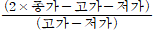

In [ ]:
print('일중강도/거래량 식=\n')

Image('일중강도식.png')

'**일중강도/거래량**' 컬럼을 생성하기 위해 필요한 데이터 로드 및 컬럼 생성

In [ ]:
df_일중강도=df_일중시세정보[['종목코드','종목명','거래일자','거래시각','시가', '고가', '저가', '종가']]
df_일중강도.sort_values(['종목명','거래일자'],inplace=True)
df_일중강도.reset_index(inplace=True,drop=True)
df_일중강도.set_index(['종목코드','종목명','거래일자'],inplace=True,drop=True)
df_일중강도_종가=df_일중강도.groupby(['종목코드','종목명','거래일자']).max('거래시각')

df_일중강도_종가=pd.DataFrame(df_일중강도_종가['거래시각'])
df_일중강도_종가=pd.merge(df_일중강도_종가,df_일중강도,on=['종목코드','종목명','거래일자','거래시각'],how='inner')
df_일중강도_종가.reset_index(inplace=True,drop=False)
df_일중강도_종가=df_일중강도_종가.set_index(['종목코드','종목명','거래일자'])
df_일중강도_종가=pd.DataFrame(df_일중강도_종가['종가'])

df_일중강도_고가=pd.DataFrame(df_일중강도.groupby(['종목코드','종목명','거래일자']).max('고가'))
df_일중강도_저가=pd.DataFrame(df_일중강도.groupby(['종목코드','종목명','거래일자']).min('저가'))
df_일중강도_고가=pd.DataFrame(df_일중강도_고가['고가'])
df_일중강도_저가=pd.DataFrame(df_일중강도_저가['저가'])

merge=pd.merge(df_일중강도_저가,df_일중강도_고가,on=['종목코드','종목명','거래일자'])
merge=pd.merge(merge,df_일중강도_종가,on=['종목코드','종목명','거래일자'])

merge['일중강도']=merge['종가']
merge['일중강도']=(2*merge['종가']-merge['고가']-merge['저가'])/(merge['고가']-merge['저가'])
df_일중강도=pd.DataFrame(merge['일중강도'])

df_일중강도.head(10)

일중강도
종목코드         종목명  거래일자              
KR7000020008 동화약품 20200102  0.666667
                  20200103 -0.636364
                  20200106 -0.411765
                  20200107 -0.222222
                  20200108 -0.333333
                  20200109 -1.000000
                  20200110  0.555556
                  20200113 -0.111111
                  20200114 -0.428571
                  20200115  0.058824

종목별로 거래일자마다 일중강도가 잘 계산된 것을 확인할 수 있다.

## 2. 호가단위
- **정보비대칭성 관련 컬럼 생성 시 계산식에서 활용하기 위해 생성한 컬럼**
- 'HS역선택 비용/호가단위', '평균호가 스프레드 /호가단위' 와 같이 활용될 예정

출처_한국거래소 홈페이지



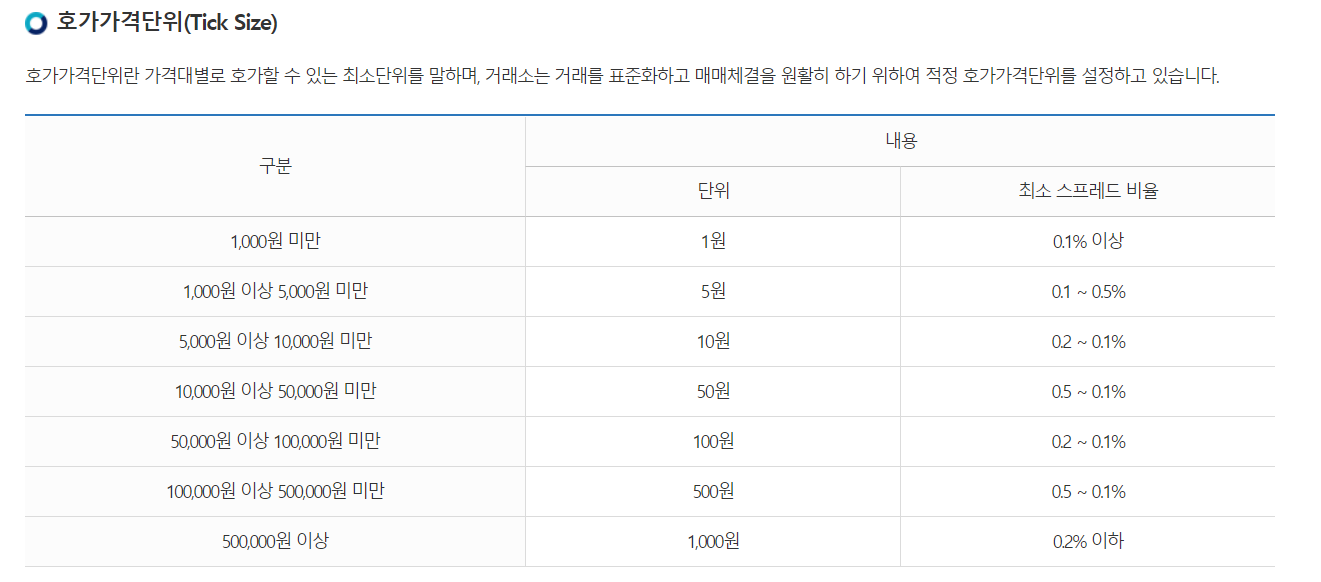

In [ ]:
print('출처_한국거래소 홈페이지\n')
Image('호가가격단위자료.png')

In [ ]:
df_호가=일별데이터[['종목코드','종목명','거래일자','시가']]
df_호가['호가단위']=""
df_호가['호가단위']=[1000  if (df_호가['시가'][i] >= 500000) 
                       else 500 if (df_호가['시가'][i] >= 100000) 
                       else 100 if (df_호가['시가'][i] >= 50000)
                       else 50 if (df_호가['시가'][i] >= 10000) 
                       else 10 if (df_호가['시가'][i] >= 5000) 
                       else 5 if (df_호가['시가'][i] >= 1000)
                       else 1 for i in range(len(df_호가))]
df_호가=df_호가[['종목코드','거래일자','호가단위']]

df_호가.head(10)

,종목코드,거래일자,호가단위
0,KR7000020008,20200102,10
1,KR7000020008,20200103,10
2,KR7000020008,20200106,10
3,KR7000020008,20200107,10
4,KR7000020008,20200108,10
5,KR7000020008,20200109,10
6,KR7000020008,20200110,10
7,KR7000020008,20200113,10
8,KR7000020008,20200114,10
9,KR7000020008,20200115,10


# 3.일중시세정보

In [ ]:
df_일중시세정보=df_일중시세정보[['종목코드','종목명','거래일자','거래시각','거래대금','종목별거래량기준매수매도불균형','HS역선택비용','평균호가스프레드','주문수량기준깊이']]
df_일중시세정보_2020 = df_일중시세정보[(df_일중시세정보['거래일자']>=20200101) & (df_일중시세정보['거래일자']<=20200331)]
df_일중시세정보_2021 = df_일중시세정보[(df_일중시세정보['거래일자']>=20210101) & (df_일중시세정보['거래일자']<=20210331)]
df_일중시세정보_2022 = df_일중시세정보[(df_일중시세정보['거래일자']>=20220101) & (df_일중시세정보['거래일자']<=20220331)]

df_일중시세정보_2020.sort_values(['종목명','거래일자'],inplace=True)
df_일중시세정보_2021.sort_values(['종목명','거래일자'],inplace=True)
df_일중시세정보_2022.sort_values(['종목명','거래일자'],inplace=True)
df_일중시세정보_2020.reset_index(inplace=True,drop=True)
df_일중시세정보_2021.reset_index(inplace=True,drop=True)
df_일중시세정보_2022.reset_index(inplace=True,drop=True)
df_일중시세정보_2020.set_index(['종목명','거래일자'],inplace=True,drop=True)
df_일중시세정보_2021.set_index(['종목명','거래일자'],inplace=True,drop=True)
df_일중시세정보_2022.set_index(['종목명','거래일자'],inplace=True,drop=True)
df_일중시세정보_2020=df_일중시세정보_2020.groupby(['종목코드','종목명','거래일자']).sum()/121
df_일중시세정보_2021=df_일중시세정보_2021.groupby(['종목코드','종목명','거래일자']).sum()/121
df_일중시세정보_2022=df_일중시세정보_2022.groupby(['종목코드','종목명','거래일자']).sum()/121
list__=[]
for i in range(0,3):
        list__.append(globals()['df_일중시세정보_202{}'.format(i)])

df_일중시세정보 = pd.concat(list__,ignore_index=False)
df_일중시세정보.drop('거래시각',inplace=True,axis=1)
df_일중시세정보.reset_index(inplace=True,drop=False)

df_일중시세정보

,종목코드,종목명,거래일자,거래대금,종목별거래량기준매수매도불균형,HS역선택비용,평균호가스프레드,주문수량기준깊이
0,KR7000020008,동화약품,20200102,8.141250e+05,0.029523,2.335742,5.918237,111.330579
1,KR7000020008,동화약품,20200103,2.869634e+06,0.054849,4.012989,15.931025,349.615702
2,KR7000020008,동화약품,20200106,2.998036e+06,0.050359,8.578756,12.392023,231.136364
3,KR7000020008,동화약품,20200107,2.290318e+06,0.027924,10.103378,11.099337,375.615702
4,KR7000020008,동화약품,20200108,8.099566e+06,0.105963,5.903853,11.906720,351.966942
...,...,...,...,...,...,...,...,...
165398,KYG5307W1015,엘브이엠씨홀딩스,20220325,1.502503e+06,0.042983,0.229933,7.172547,443.859504
165399,KYG5307W1015,엘브이엠씨홀딩스,20220328,2.395321e+06,0.061649,3.112555,6.388187,762.289256
165400,KYG5307W1015,엘브이엠씨홀딩스,20220329,3.359909e+06,0.135578,3.015361,6.201403,1482.838843
165401,KYG5307W1015,엘브이엠씨홀딩스,20220330,2.615779e+06,0.101526,2.348232,6.879849,856.243802


### 3.1 호가단위

In [ ]:
df_일중시세정보=pd.merge(df_일중시세정보,df_호가,on=['종목코드','거래일자'],how='inner')
df_일중시세정보

,종목코드,종목명,거래일자,거래대금,종목별거래량기준매수매도불균형,HS역선택비용,평균호가스프레드,주문수량기준깊이,호가단위
0,KR7000020008,동화약품,20200102,8.141250e+05,0.029523,2.335742,5.918237,111.330579,10
1,KR7000020008,동화약품,20200103,2.869634e+06,0.054849,4.012989,15.931025,349.615702,10
2,KR7000020008,동화약품,20200106,2.998036e+06,0.050359,8.578756,12.392023,231.136364,10
3,KR7000020008,동화약품,20200107,2.290318e+06,0.027924,10.103378,11.099337,375.615702,10
4,KR7000020008,동화약품,20200108,8.099566e+06,0.105963,5.903853,11.906720,351.966942,10
...,...,...,...,...,...,...,...,...,...
165398,KYG5307W1015,엘브이엠씨홀딩스,20220325,1.502503e+06,0.042983,0.229933,7.172547,443.859504,5
165399,KYG5307W1015,엘브이엠씨홀딩스,20220328,2.395321e+06,0.061649,3.112555,6.388187,762.289256,5
165400,KYG5307W1015,엘브이엠씨홀딩스,20220329,3.359909e+06,0.135578,3.015361,6.201403,1482.838843,5
165401,KYG5307W1015,엘브이엠씨홀딩스,20220330,2.615779e+06,0.101526,2.348232,6.879849,856.243802,5


### 3.2 시가총액

In [ ]:
df_시가총액=df_일별시세정보[['종목코드','거래일자','시가총액']]
df_일중시세정보=pd.merge(df_일중시세정보,df_시가총액,on=['종목코드','거래일자'],how='inner')
df_일중시세정보

,종목코드,종목명,거래일자,거래대금,종목별거래량기준매수매도불균형,HS역선택비용,평균호가스프레드,주문수량기준깊이,호가단위,시가총액
0,KR7000020008,동화약품,20200102,8.141250e+05,0.029523,2.335742,5.918237,111.330579,10,234624348000
1,KR7000020008,동화약품,20200103,2.869634e+06,0.054849,4.012989,15.931025,349.615702,10,233507089200
2,KR7000020008,동화약품,20200106,2.998036e+06,0.050359,8.578756,12.392023,231.136364,10,228479424600
3,KR7000020008,동화약품,20200107,2.290318e+06,0.027924,10.103378,11.099337,375.615702,10,227920795200
4,KR7000020008,동화약품,20200108,8.099566e+06,0.105963,5.903853,11.906720,351.966942,10,221496557100
...,...,...,...,...,...,...,...,...,...,...
165398,KYG5307W1015,엘브이엠씨홀딩스,20220325,1.502503e+06,0.042983,0.229933,7.172547,443.859504,5,333175244950
165399,KYG5307W1015,엘브이엠씨홀딩스,20220328,2.395321e+06,0.061649,3.112555,6.388187,762.289256,5,332180691980
165400,KYG5307W1015,엘브이엠씨홀딩스,20220329,3.359909e+06,0.135578,3.015361,6.201403,1482.838843,5,337650733315
165401,KYG5307W1015,엘브이엠씨홀딩스,20220330,2.615779e+06,0.101526,2.348232,6.879849,856.243802,5,338645286285


### 3.3 일중강도와 호가단위를 이용한 파생변수 생성

In [ ]:
df_일중강도.reset_index(inplace=True,drop=False)
df_일중강도 = df_일중강도[['종목코드','거래일자','일중강도']]
df_일중시세정보=pd.merge(df_일중시세정보,df_일중강도,on=['종목코드','거래일자'],how='inner')
df_일중시세정보

,종목코드,종목명,거래일자,거래대금,종목별거래량기준매수매도불균형,HS역선택비용,평균호가스프레드,주문수량기준깊이,호가단위,시가총액,일중강도
0,KR7000020008,동화약품,20200102,8.141250e+05,0.029523,2.335742,5.918237,111.330579,10,234624348000,0.666667
1,KR7000020008,동화약품,20200103,2.869634e+06,0.054849,4.012989,15.931025,349.615702,10,233507089200,-0.636364
2,KR7000020008,동화약품,20200106,2.998036e+06,0.050359,8.578756,12.392023,231.136364,10,228479424600,-0.411765
3,KR7000020008,동화약품,20200107,2.290318e+06,0.027924,10.103378,11.099337,375.615702,10,227920795200,-0.222222
4,KR7000020008,동화약품,20200108,8.099566e+06,0.105963,5.903853,11.906720,351.966942,10,221496557100,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...
165398,KYG5307W1015,엘브이엠씨홀딩스,20220325,1.502503e+06,0.042983,0.229933,7.172547,443.859504,5,333175244950,0.500000
165399,KYG5307W1015,엘브이엠씨홀딩스,20220328,2.395321e+06,0.061649,3.112555,6.388187,762.289256,5,332180691980,-0.818182
165400,KYG5307W1015,엘브이엠씨홀딩스,20220329,3.359909e+06,0.135578,3.015361,6.201403,1482.838843,5,337650733315,0.384615
165401,KYG5307W1015,엘브이엠씨홀딩스,20220330,2.615779e+06,0.101526,2.348232,6.879849,856.243802,5,338645286285,-1.000000


In [ ]:
df_일중시세정보['거래대금/시가총액'] = df_일중시세정보['거래대금'] / df_일중시세정보['시가총액']
df_일중시세정보['평균호가스프레드/호가단위'] = df_일중시세정보['평균호가스프레드'] / df_일중시세정보['호가단위']
df_일중시세정보['HS역선택비용/호가단위'] = df_일중시세정보['HS역선택비용'] / df_일중시세정보['호가단위']

### 3.4 일중데이터를 활용하여 최종 데이터셋 생성

In [ ]:
df_일중시세정보_최종=df_일중시세정보[['종목코드','거래일자','종목명','종목별거래량기준매수매도불균형','평균호가스프레드/호가단위','HS역선택비용/호가단위','거래대금/시가총액','주문수량기준깊이','일중강도']]
df_일중시세정보_최종

,종목코드,거래일자,종목명,종목별거래량기준매수매도불균형,평균호가스프레드/호가단위,HS역선택비용/호가단위,거래대금/시가총액,주문수량기준깊이,일중강도
0,KR7000020008,20200102,동화약품,0.029523,0.591824,0.233574,0.000003,111.330579,0.666667
1,KR7000020008,20200103,동화약품,0.054849,1.593103,0.401299,0.000012,349.615702,-0.636364
2,KR7000020008,20200106,동화약품,0.050359,1.239202,0.857876,0.000013,231.136364,-0.411765
3,KR7000020008,20200107,동화약품,0.027924,1.109934,1.010338,0.000010,375.615702,-0.222222
4,KR7000020008,20200108,동화약품,0.105963,1.190672,0.590385,0.000037,351.966942,-0.333333
...,...,...,...,...,...,...,...,...,...
165398,KYG5307W1015,20220325,엘브이엠씨홀딩스,0.042983,1.434509,0.045987,0.000005,443.859504,0.500000
165399,KYG5307W1015,20220328,엘브이엠씨홀딩스,0.061649,1.277637,0.622511,0.000007,762.289256,-0.818182
165400,KYG5307W1015,20220329,엘브이엠씨홀딩스,0.135578,1.240281,0.603072,0.000010,1482.838843,0.384615
165401,KYG5307W1015,20220330,엘브이엠씨홀딩스,0.101526,1.375970,0.469646,0.000008,856.243802,-1.000000


### 3.4 외국인 체결강도와 외국인 순매수금 컬럼 구하기

In [ ]:
df_외국인데이터
df_외국인데이터=df_외국인데이터[(df_외국인데이터['거래시각']>=910) & (df_외국인데이터['거래시각']<=1100)]
df_외국인거래실적_체결강도 = df_외국인데이터[['거래일자','종목명','종목코드','거래시각','매도거래량','매수거래량']]
df_체결강도 = df_외국인거래실적_체결강도.groupby(['종목코드', '거래일자'])['매도거래량','매수거래량'].sum()
df_체결강도['외국인체결강도'] = df_체결강도['매수거래량'] / df_체결강도['매도거래량'] * 100
df_체결강도.reset_index(inplace=True,drop=False)
df_외국인체결강도=df_체결강도[['종목코드','거래일자','외국인체결강도']]

df_외국인체결강도.head(10)

,종목코드,거래일자,외국인체결강도
0,KR7000020008,20200102,92.626447
1,KR7000020008,20200103,213.886866
2,KR7000020008,20200106,113.069336
3,KR7000020008,20200107,173.530255
4,KR7000020008,20200108,111.036811
5,KR7000020008,20200109,59.059633
6,KR7000020008,20200110,38.381643
7,KR7000020008,20200113,115.252357
8,KR7000020008,20200114,138.472834
9,KR7000020008,20200115,1003.890160


### 3.5 외국인 순매수금액

In [ ]:
df_투자자별거래실적_외국인순매수=df_외국인데이터[['종목코드','종목명','거래일자','거래시각','매수거래대금','매도거래대금']]
df_투자자별거래실적_외국인순매수=df_투자자별거래실적_외국인순매수[(df_투자자별거래실적_외국인순매수['거래시각']>=900) & (df_투자자별거래실적_외국인순매수['거래시각']<=1100)]
df_투자자별거래실적_외국인순매수['외국인순매수']=df_투자자별거래실적_외국인순매수['매수거래대금']-df_투자자별거래실적_외국인순매수['매도거래대금']
df_투자자별거래실적_외국인순매수=df_투자자별거래실적_외국인순매수[['종목코드','종목명','거래일자','거래시각','외국인순매수']]
df_투자자별거래실적_외국인순매수=df_투자자별거래실적_외국인순매수.groupby(['종목코드','종목명','거래일자']).sum()

df_투자자별거래실적_외국인순매수
df_투자자별거래실적_외국인순매수.drop('거래시각',inplace=True,axis=1)
df_투자자별거래실적_외국인순매수.reset_index(inplace=True,drop=False)

df_투자자별거래실적_외국인순매수.head(10)

,종목코드,종목명,거래일자,외국인순매수
0,KR7000020008,동화약품,20200102,-1988140
1,KR7000020008,동화약품,20200103,39278070
2,KR7000020008,동화약품,20200106,7357260
3,KR7000020008,동화약품,20200107,20924590
4,KR7000020008,동화약품,20200108,13072710
5,KR7000020008,동화약품,20200109,-2843650
6,KR7000020008,동화약품,20200110,-20173980
7,KR7000020008,동화약품,20200113,4472520
8,KR7000020008,동화약품,20200114,6475780
9,KR7000020008,동화약품,20200115,31914030


# 4. 설명 변수 데이터셋

In [ ]:
df_최종=pd.merge(df_일중시세정보_최종,df_외국인체결강도,on=['종목코드','거래일자'],how='inner')
df_최종=pd.merge(df_최종,df_투자자별거래실적_외국인순매수,on=['종목코드','거래일자'],how='inner')
df_최종.drop('종목명_y',inplace=True,axis=1)
df_최종.columns = ['종목코드','거래일자','종목명','종목별거래량기준매수매도불균형','평균호가스프레드/호가단위','HS역선택비용/호가단위','거래대금/시가총액','주문수량기준깊이','일중강도','외국인체결강도','외국인순매수']

df_최종.head(10)

,종목코드,거래일자,종목명,종목별거래량기준매수매도불균형,평균호가스프레드/호가단위,HS역선택비용/호가단위,거래대금/시가총액,주문수량기준깊이,일중강도,외국인체결강도,외국인순매수
0,KR7000020008,20200102,동화약품,0.029523,0.591824,0.233574,0.000003,111.330579,0.666667,92.626447,-1988140
1,KR7000020008,20200103,동화약품,0.054849,1.593103,0.401299,0.000012,349.615702,-0.636364,213.886866,39278070
2,KR7000020008,20200106,동화약품,0.050359,1.239202,0.857876,0.000013,231.136364,-0.411765,113.069336,7357260
3,KR7000020008,20200107,동화약품,0.027924,1.109934,1.010338,0.000010,375.615702,-0.222222,173.530255,20924590
4,KR7000020008,20200108,동화약품,0.105963,1.190672,0.590385,0.000037,351.966942,-0.333333,111.036811,13072710
5,KR7000020008,20200109,동화약품,0.026881,0.471062,0.210168,0.000003,96.078512,-1.000000,59.059633,-2843650
6,KR7000020008,20200110,동화약품,0.052531,1.211319,0.475831,0.000004,268.330579,0.555556,38.381643,-20173980
7,KR7000020008,20200113,동화약품,0.015776,0.843085,0.374143,0.000008,355.074380,-0.111111,115.252357,4472520
8,KR7000020008,20200114,동화약품,0.037132,0.846093,0.365846,0.000005,219.603306,-0.428571,138.472834,6475780
9,KR7000020008,20200115,동화약품,0.047363,1.000782,0.807857,0.000007,154.082645,0.058824,1003.890160,31914030


# 5. 종속변수(종가대비 시가 상승여부)

In [ ]:
df_종가시가상승여부=df_일별시세정보[['거래일자','종목명','종목코드','시가','종가']]
df_종가시가상승여부['종가-시가상승'] = df_종가시가상승여부['종가'] - df_종가시가상승여부['시가']
df_종가시가상승여부['종가-시가상승여부']=[1  if (df_종가시가상승여부['종가-시가상승'][i] > 0) 
                       else 0 for i in range(len(df_종가시가상승여부))] 
df_종가시가상승여부['종가-시가상승여부']=[1  if (df_종가시가상승여부['종가-시가상승'][i] > 0) 
                       else 0 for i in range(len(df_종가시가상승여부))] 
df_종가시가상승여부=df_종가시가상승여부[['종목코드','거래일자','종가-시가상승여부']]

df_종가시가상승여부.head(10)

,종목코드,거래일자,종가-시가상승여부
0,KR7000020008,20200102,1
1,KR7000020008,20200103,0
2,KR7000020008,20200106,0
3,KR7000020008,20200107,0
4,KR7000020008,20200108,0
5,KR7000020008,20200109,0
6,KR7000020008,20200110,1
7,KR7000020008,20200113,1
8,KR7000020008,20200114,0
9,KR7000020008,20200115,0


# 6. 최종데이터

### 6.1 종속변수와 설명변수 데이터셋 결합

In [ ]:
df_최종=pd.merge(df_최종,df_종가시가상승여부,on=['종목코드','거래일자'],how='inner')
df_최종

,종목코드,거래일자,종목명,종목별거래량기준매수매도불균형,평균호가스프레드/호가단위,HS역선택비용/호가단위,거래대금/시가총액,주문수량기준깊이,일중강도,외국인체결강도,외국인순매수,종가-시가상승여부
0,KR7000020008,20200102,동화약품,0.029523,0.591824,0.233574,0.000003,111.330579,0.666667,92.626447,-1988140,1
1,KR7000020008,20200103,동화약품,0.054849,1.593103,0.401299,0.000012,349.615702,-0.636364,213.886866,39278070,0
2,KR7000020008,20200106,동화약품,0.050359,1.239202,0.857876,0.000013,231.136364,-0.411765,113.069336,7357260,0
3,KR7000020008,20200107,동화약품,0.027924,1.109934,1.010338,0.000010,375.615702,-0.222222,173.530255,20924590,0
4,KR7000020008,20200108,동화약품,0.105963,1.190672,0.590385,0.000037,351.966942,-0.333333,111.036811,13072710,0
...,...,...,...,...,...,...,...,...,...,...,...,...
151527,KYG5307W1015,20220325,엘브이엠씨홀딩스,0.042983,1.434509,0.045987,0.000005,443.859504,0.500000,196.440678,3774705,1
151528,KYG5307W1015,20220328,엘브이엠씨홀딩스,0.061649,1.277637,0.622511,0.000007,762.289256,-0.818182,137.890572,9045150,0
151529,KYG5307W1015,20220329,엘브이엠씨홀딩스,0.135578,1.240281,0.603072,0.000010,1482.838843,0.384615,195.481990,31423335,1
151530,KYG5307W1015,20220330,엘브이엠씨홀딩스,0.101526,1.375970,0.469646,0.000008,856.243802,-1.000000,60.881082,-9542580,0


### 6-2. 우선주 및 특정 투자주식 제거를 위한 전처리

In [ ]:
df_최종=df_최종[df_최종['종목명'].str.endswith('우')==False] #우선주 제거
df_최종=df_최종[df_최종['종목명'].str.endswith('우B')==False] #우선주 제거
df_최종=df_최종[df_최종['종목명'].str.endswith('1우B')==False] #우선주 제거
df_최종=df_최종[df_최종['종목명'].str.endswith('2우B')==False] #우선주 제거
df_최종=df_최종[df_최종['종목명'].str.endswith('3우B')==False] #우선주 제거
df_최종=df_최종[df_최종['종목명'].str.endswith('우(전환)')==False] #우선주 제거
df_최종=df_최종[df_최종['종목명'].str.endswith('1호')==False] # 호 제거
df_최종=df_최종[df_최종['종목명'].str.endswith('2호')==False] 
df_최종=df_최종[df_최종['종목명'].str.endswith('3호')==False] 
df_최종=df_최종[df_최종['종목명'].str.endswith('8호')==False] 
df_최종=df_최종[df_최종['종목명'].str.endswith('12호')==False] 
df_최종=df_최종[df_최종['종목명'].str.endswith('13호')==False] 
df_최종=df_최종[df_최종['종목명'].str.endswith('19호')==False] 

df_최종.head(10)

,종목코드,거래일자,종목명,종목별거래량기준매수매도불균형,평균호가스프레드/호가단위,HS역선택비용/호가단위,거래대금/시가총액,주문수량기준깊이,일중강도,외국인체결강도,외국인순매수,종가-시가상승여부
0,KR7000020008,20200102,동화약품,0.029523,0.591824,0.233574,0.000003,111.330579,0.666667,92.626447,-1988140,1
1,KR7000020008,20200103,동화약품,0.054849,1.593103,0.401299,0.000012,349.615702,-0.636364,213.886866,39278070,0
2,KR7000020008,20200106,동화약품,0.050359,1.239202,0.857876,0.000013,231.136364,-0.411765,113.069336,7357260,0
3,KR7000020008,20200107,동화약품,0.027924,1.109934,1.010338,0.000010,375.615702,-0.222222,173.530255,20924590,0
4,KR7000020008,20200108,동화약품,0.105963,1.190672,0.590385,0.000037,351.966942,-0.333333,111.036811,13072710,0
5,KR7000020008,20200109,동화약품,0.026881,0.471062,0.210168,0.000003,96.078512,-1.000000,59.059633,-2843650,0
6,KR7000020008,20200110,동화약품,0.052531,1.211319,0.475831,0.000004,268.330579,0.555556,38.381643,-20173980,1
7,KR7000020008,20200113,동화약품,0.015776,0.843085,0.374143,0.000008,355.074380,-0.111111,115.252357,4472520,1
8,KR7000020008,20200114,동화약품,0.037132,0.846093,0.365846,0.000005,219.603306,-0.428571,138.472834,6475780,0
9,KR7000020008,20200115,동화약품,0.047363,1.000782,0.807857,0.000007,154.082645,0.058824,1003.890160,31914030,0


### 6.3 특정열에 있는 inf값 전처리 및 데이터셋 최종

In [ ]:
inf_df = df_최종[np.isinf(df_최종['외국인체결강도'])]
inf_df

,종목코드,거래일자,종목명,종목별거래량기준매수매도불균형,평균호가스프레드/호가단위,HS역선택비용/호가단위,거래대금/시가총액,주문수량기준깊이,일중강도,외국인체결강도,외국인순매수,종가-시가상승여부
10,KR7000020008,20200116,동화약품,0.019794,0.791189,0.109367,0.000003,266.210744,-0.111111,inf,19224530,0
76,KR7000040006,20200122,KR모터스,0.039644,0.729222,0.080406,0.000007,8455.334711,-1.000000,inf,3878280,0
85,KR7000040006,20200221,KR모터스,0.206066,3.290714,0.765363,0.000081,1377.264463,-0.682540,inf,20202776,0
135,KR7000050005,20200205,경방,0.019885,0.518090,0.158417,0.000003,181.227273,0.454545,inf,3402130,1
136,KR7000050005,20200206,경방,0.034798,0.623818,0.598587,0.000003,101.413223,0.866667,inf,19483810,1
...,...,...,...,...,...,...,...,...,...,...,...,...
151276,KR7400760005,20220303,NH올원리츠,0.231854,1.034456,0.193521,0.000010,5882.442149,0.500000,inf,46129700,0
151291,KR7400760005,20220329,NH올원리츠,0.322364,0.965417,-0.008442,0.000006,7030.863636,-1.000000,inf,7440800,1
151386,KR7404990004,20220223,신한서부티엔디리츠,0.040064,0.991991,0.230008,0.000001,1332.950413,-0.500000,inf,9138165,1
151406,KR7404990004,20220325,신한서부티엔디리츠,0.129258,1.454990,0.079129,0.000006,10323.541322,0.333333,inf,31159950,1


In [ ]:
df_최종 = df_최종.replace([np.inf, -np.inf], np.nan).dropna(subset=["외국인체결강도"], how="all")# inf 값 삭제

df_최종

,종목코드,거래일자,종목명,종목별거래량기준매수매도불균형,평균호가스프레드/호가단위,HS역선택비용/호가단위,거래대금/시가총액,주문수량기준깊이,일중강도,외국인체결강도,외국인순매수,종가-시가상승여부
0,KR7000020008,20200102,동화약품,0.029523,0.591824,0.233574,0.000003,111.330579,0.666667,92.626447,-1988140,1
1,KR7000020008,20200103,동화약품,0.054849,1.593103,0.401299,0.000012,349.615702,-0.636364,213.886866,39278070,0
2,KR7000020008,20200106,동화약품,0.050359,1.239202,0.857876,0.000013,231.136364,-0.411765,113.069336,7357260,0
3,KR7000020008,20200107,동화약품,0.027924,1.109934,1.010338,0.000010,375.615702,-0.222222,173.530255,20924590,0
4,KR7000020008,20200108,동화약품,0.105963,1.190672,0.590385,0.000037,351.966942,-0.333333,111.036811,13072710,0
...,...,...,...,...,...,...,...,...,...,...,...,...
151527,KYG5307W1015,20220325,엘브이엠씨홀딩스,0.042983,1.434509,0.045987,0.000005,443.859504,0.500000,196.440678,3774705,1
151528,KYG5307W1015,20220328,엘브이엠씨홀딩스,0.061649,1.277637,0.622511,0.000007,762.289256,-0.818182,137.890572,9045150,0
151529,KYG5307W1015,20220329,엘브이엠씨홀딩스,0.135578,1.240281,0.603072,0.000010,1482.838843,0.384615,195.481990,31423335,1
151530,KYG5307W1015,20220330,엘브이엠씨홀딩스,0.101526,1.375970,0.469646,0.000008,856.243802,-1.000000,60.881082,-9542580,0


### 6.4 null값 확인 및 null값 들어있는 행 제거

In [ ]:
df_최종.isnull().sum()

종목코드                0
거래일자                0
종목명                 0
종목별거래량기준매수매도불균형     0
평균호가스프레드/호가단위       0
HS역선택비용/호가단위        0
거래대금/시가총액           0
주문수량기준깊이            0
일중강도               14
외국인체결강도             0
외국인순매수              0
종가-시가상승여부           0
dtype: int64

In [ ]:
df_최종 = df_최종.dropna(axis=0)

### 7. 최종 데이터셋 추출

In [ ]:
df_최종=df_최종[['종목코드','종목명','거래일자','외국인체결강도','종목별거래량기준매수매도불균형','주문수량기준깊이', 
             '일중강도','외국인순매수','거래대금/시가총액','HS역선택비용/호가단위','평균호가스프레드/호가단위','종가-시가상승여부']] # 컬럼 순서 조정

df_최종.sort_values(['종목명','거래일자'],inplace=True) # 종목명과 거래일자 순으로 배열

df_최종.set_index(['종목코드','종목명','거래일자'],inplace=True,drop=True)

df_최종.to_csv('추출된_데이터셋.csv',encoding='cp949')

df_최종

외국인체결강도  종목별거래량기준매수매도불균형      주문수량기준깊이  \
종목코드         종목명    거래일자                                                   
KR7095570008 AJ네트웍스 20200102   123.156736         0.086036    345.603306   
                    20200103  1563.471074         0.168000    686.057851   
                    20200106    92.291312         0.144157    372.768595   
                    20200107   140.513834         0.082623    152.404959   
                    20200108    95.459976         0.105091    625.483471   
...                                   ...              ...           ...   
KR7003280005 흥아해운   20220325    81.227261         0.222364  10166.818182   
                    20220328   305.955740         0.290508   2118.652893   
                    20220329   121.773482         0.428888   2108.475207   
                    20220330    53.183763         0.313702   1648.714876   
                    20220331    97.368270         0.355257   1627.144628   

                                  일중강도     외국인순매수  거래대금/시가총액  HS역선택비용/호가단위  \
종목코드         종목명    거래일자                                                     
KR7095570008 AJ네트웍스 20200102  0.904762    7352500   0.000007      0.760852   
                    20200103  0.090909   45256830   0.000009      0.241564   
                    20200106 -0.538462   -2725550   0.000011      0.711561   
                    20200107  0.555556    4036365   0.000003      0.231931   
                    20200108 -0.076923   -5180780   0.000011      0.794730   
...                                ...        ...        ...           ...   
KR7003280005 흥아해운   20220325 -0.818182  -14357520   0.000009      0.476322   
                    20220328 -0.714286  152357730   0.000010      0.751238   
                    20220329 -0.428571   27134850   0.000010      1.114397   
                    20220330  0.698113 -400951370   0.000068      1.545055   
                    20220331  0.545455   -7958920   0.000021     -0.224504   

                              평균호가스프레드/호가단위  종가-시가상승여부  
종목코드         종목명    거래일자                                
KR7095570008 AJ네트웍스 20200102       1.719553          1  
                    20200103       0.916159          1  
                    20200106       1.163915          0  
                    20200107       1.131024          0  
                    20200108       1.461805          0  
...                                     ...        ...  
KR7003280005 흥아해운   20220325       1.195621          0  
                    20220328       1.317099          0  
                    20220329       1.291809          0  
                    20220330       1.344576          1  
                    20220331       1.757606          1  

[136359 rows x 9 columns]

### 8. 데이터 탐색(EDA)

In [ ]:
plt.rc('font', family='NanumBarunGothic')

### 8.1 데이터 분포 확인

외국인체결강도의 # 왜도 : 140.83  # 첨도 : 25557.88
종목별거래량기준매수매도불균형의 # 왜도 : 0.36  # 첨도 : -0.92
주문수량기준깊이의 # 왜도 : 91.98  # 첨도 : 13485.42
일중강도의 # 왜도 : 0.21  # 첨도 : -1.04
외국인순매수의 # 왜도 : -23.71  # 첨도 : 2883.75
거래대금/시가총액의 # 왜도 : 15.39  # 첨도 : 340.29
HS역선택비용/호가단위의 # 왜도 : 69.93  # 첨도 : 5673.24
평균호가스프레드/호가단위의 # 왜도 : -64.14  # 첨도 : 5108.69


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


종가-시가상승여부의 # 왜도 : 0.22  # 첨도 : -1.95


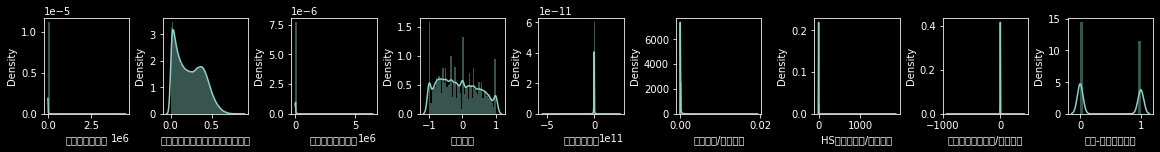

In [ ]:
# distplot 분포 탐색
plt.rcParams["figure.figsize"] = (16,2)
fig, axes = plt.subplots(1,9, constrained_layout=True)

for i in range(0,9,1):
    sns.distplot(df_최종.iloc[:,i], ax = axes[i])
    print(f'{df_최종.columns[i]}의 # 왜도 : {np.round(skew(df_최종.iloc[:,i]),2)}  # 첨도 : {np.round(kurtosis(df_최종.iloc[:,i]),2)}')
plt.show()

### 8.2 데이터 이상치 확인

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


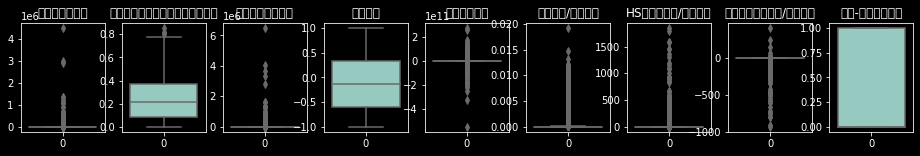

In [ ]:
# 전체 박스플롯으로 이상치 탐색
plt.rcParams["figure.figsize"] = (16,2)
fig, axes = plt.subplots(1,9)

for i in range(0,9,1):
    sns.boxplot(data =(df_최종).iloc[:,i], orient="v", ax = axes[i])
    axes[i].set_title(df_최종.columns[i])
plt.show()

### 8.3 변수 간 상관관계 확인

In [ ]:
# 상관성 분석
corr_df = df_최종.corr()
corr_df

,외국인체결강도,종목별거래량기준매수매도불균형,주문수량기준깊이,일중강도,외국인순매수,거래대금/시가총액,HS역선택비용/호가단위,평균호가스프레드/호가단위,종가-시가상승여부
외국인체결강도,1.000000,-0.020201,0.009756,0.013266,0.001733,-0.001241,0.013379,-0.013780,0.009823
종목별거래량기준매수매도불균형,-0.020201,1.000000,0.068167,0.123315,-0.011845,0.174351,-0.003346,0.008530,0.106112
주문수량기준깊이,0.009756,0.068167,1.000000,0.021281,-0.038331,0.110921,0.316541,-0.295964,0.000336
일중강도,0.013266,0.123315,0.021281,1.000000,0.073408,0.014663,0.034891,-0.033993,0.486548
외국인순매수,0.001733,-0.011845,-0.038331,0.073408,1.000000,-0.007463,0.000491,0.000636,0.059111
거래대금/시가총액,-0.001241,0.174351,0.110921,0.014663,-0.007463,1.000000,0.114266,-0.109876,0.031309
HS역선택비용/호가단위,0.013379,-0.003346,0.316541,0.034891,0.000491,0.114266,1.000000,-0.979191,0.018761
평균호가스프레드/호가단위,-0.013780,0.008530,-0.295964,-0.033993,0.000636,-0.109876,-0.979191,1.000000,-0.013602
종가-시가상승여부,0.009823,0.106112,0.000336,0.486548,0.059111,0.031309,0.018761,-0.013602,1.000000


<AxesSubplot:>

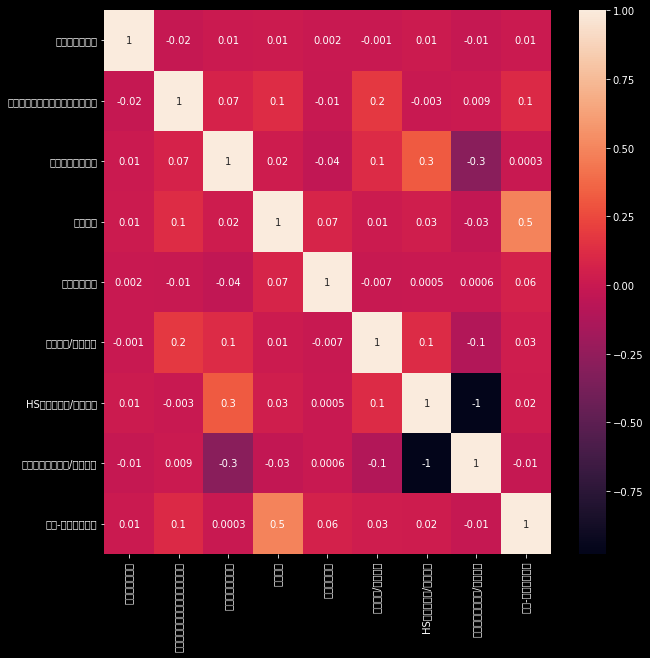

In [ ]:
# 히트맵으로 시각화
plt.figure(figsize=(10,10))
sns.heatmap(corr_df, annot=True, fmt='.1g')

# 9. 모델링

### 9.1 데이터 셋 분리 

In [ ]:
# features(설명변수), target(종속변수) 분리
target = df_최종['종가-시가상승여부']
features = df_최종.drop(['종가-시가상승여부'], axis=1)

### 9.2 데이터의 불균형도 확인

In [ ]:
df_최종['종가-시가상승여부'].value_counts()

0    75743
1    60616
Name: 종가-시가상승여부, dtype: int64

### 9.3 데이터 로짓 분석을 통한 확인

In [ ]:
# statsmodels의 logit 분석을 위해 X 변수 생성
X = features.reset_index(drop=True)
y = target.reset_index(drop=True)

# y 변수 배열 조정
y = np.array(y).reshape(-1,1)
y.shape

print(X)
print(X.shape)
print(y.shape)

            외국인체결강도  종목별거래량기준매수매도불균형      주문수량기준깊이      일중강도     외국인순매수  \
0        123.156736         0.086036    345.603306  0.904762    7352500   
1       1563.471074         0.168000    686.057851  0.090909   45256830   
2         92.291312         0.144157    372.768595 -0.538462   -2725550   
3        140.513834         0.082623    152.404959  0.555556    4036365   
4         95.459976         0.105091    625.483471 -0.076923   -5180780   
...             ...              ...           ...       ...        ...   
136354    81.227261         0.222364  10166.818182 -0.818182  -14357520   
136355   305.955740         0.290508   2118.652893 -0.714286  152357730   
136356   121.773482         0.428888   2108.475207 -0.428571   27134850   
136357    53.183763         0.313702   1648.714876  0.698113 -400951370   
136358    97.368270         0.355257   1627.144628  0.545455   -7958920   

        거래대금/시가총액  HS역선택비용/호가단위  평균호가스프레드/호가단위  
0        0.000007      0.760852       1.719553  
1

### 9.4 설명변수 검정(t검정)을 통한 유의변수 도출

In [ ]:
# 로짓 t검정

# 상수항 추가
X = sm.add_constant(X)

model = sm.GLM(y, X, family=sm.families.Binomial())
results = model.fit(atol=1e-10)
print(results.summary())
print(f'AIC Score : {results.aic:.4f}')

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               136359
Model:                            GLM   Df Residuals:                   136351
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -75790.
Date:                Fri, 22 Jul 2022   Deviance:                   1.5158e+05
Time:                        02:47:15   Pearson chi2:                 2.24e+10
No. Iterations:                    10   Pseudo R-squ. (CS):             0.2308
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3362      0.015    -

### 9.5 모델링을 위한 train,test 셋 분리

In [ ]:
# 트레인, 테스트 셋 분리
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=9)
X_train

,,,외국인체결강도,종목별거래량기준매수매도불균형,주문수량기준깊이,일중강도,외국인순매수,거래대금/시가총액,HS역선택비용/호가단위,평균호가스프레드/호가단위
종목코드,종목명,거래일자,,,,,,,,
KR7000860007,강남제비스코,20200306,4.065041,0.000000,8.181818,-0.200000,-2089100,4.161529e-07,0.045455,0.261708
KR7014910004,성문전자,20220228,128.523862,0.015467,467.057851,-0.142857,580025,1.203839e-05,0.023617,0.992825
KR7145270005,케이탑리츠,20220324,80.226432,0.233249,3839.421488,-0.142857,-5588495,2.668963e-05,0.171783,1.162125
KR7008490005,서흥,20220209,677.380952,0.074291,87.512397,-1.000000,19665950,1.945121e-06,0.204689,1.090333
KR7007690001,국도화학,20220110,43.277247,0.519308,308.826446,0.647059,-474382100,7.105179e-05,0.804025,1.131754
...,...,...,...,...,...,...,...,...,...,...
KR7192820009,코스맥스,20200206,160.417026,0.491152,448.884298,0.666667,252363800,2.515668e-05,0.476194,1.068423
KR7012600003,센트럴인사이트,20210126,20.679902,0.200427,1353.942149,-0.333333,-171689700,1.429072e-04,0.400247,1.077722
KR7101140002,인바이오젠,20210323,160.926970,0.309110,1126.561983,-0.722222,190255115,1.131854e-04,1.618190,2.155677


### 9.6 Catboost를 사용한 학습과 검증 및 GridsearchCV를 통한 최적 파라미터 선정

In [ ]:
cat_param_grid = {
    'iterations': [1000, 1600, 2000, 2400],
    'learning_rate': [0.1,0.01, 0.03, 0.05],
    'random_state':[8, 16, 42],
}

In [ ]:
cat_3_3= CatBoostClassifier(verbose=False)

clf2 = GridSearchCV(cat_3_3, param_grid=cat_param_grid,
                    scoring='accuracy', n_jobs=-1, cv=3)



clf3 = GridSearchCV(cat_3_3, param_grid=cat_param_grid,
                    scoring='f1', n_jobs=-1, cv=3)

clf2.fit(X_train, y_train.values.ravel())
clf3.fit(X_train, y_train.values.ravel())

print(f'최적 하이퍼 파라미터 : {clf2.best_params_}, 최적 평균 정확도 : {np.round(clf2.best_score_,4)}')
print(f'최적 하이퍼 파라미터 : {clf3.best_params_}, 최적 평균 F1스코어 : {np.round(clf3.best_score_,4)}')

최적 하이퍼 파라미터 : {'iterations': 2400, 'learning_rate': 0.01, 'random_state': 8}, 최적 평균 정확도 : 0.7344
최적 하이퍼 파라미터 : {'iterations': 2400, 'learning_rate': 0.01, 'random_state': 8}, 최적 평균 F1스코어 : 0.689


### 9.8 Catboost를 통해서 알 수 있는 설명변수 중요도 

In [ ]:
cat= CatBoostClassifier(verbose=False, iterations= 2400, learning_rate= 0.01, random_state= 8)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

일중강도               38.454716
종목별거래량기준매수매도불균형    10.754558
HS역선택비용/호가단위        9.617839
외국인순매수              9.443104
외국인체결강도             9.266485
거래대금/시가총액           8.921364
평균호가스프레드/호가단위       7.017767
주문수량기준깊이            6.524168
dtype: float64


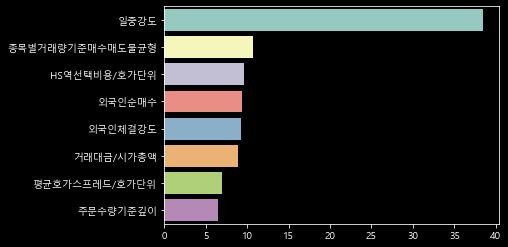

In [ ]:
# catboost 방식 사용시 회귀 트리의 피쳐 중요도 파악
feature_series = pd.Series(data = cat.feature_importances_, index=X_train.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)
print(feature_series)